epoch,train_loss,valid_loss,accuracy,time
0,3.217574,3.427592,0.290323,00:36


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,3.193243,2.649810,0.354839,00:43
1,2.880646,2.110524,0.387097,00:43
2,2.549592,1.681798,0.451613,01:08
3,2.281107,1.477972,0.677419,00:46
4,1.991427,1.452858,0.709677,00:44
5,1.738560,1.419514,0.709677,00:43
6,1.542002,1.345861,0.709677,00:43
7,1.403352,1.270285,0.709677,00:43
8,1.268392,1.201538,0.709677,00:50
9,1.181232,1.136502,0.741935,00:43


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes sh

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Model training and saving completed successfully!


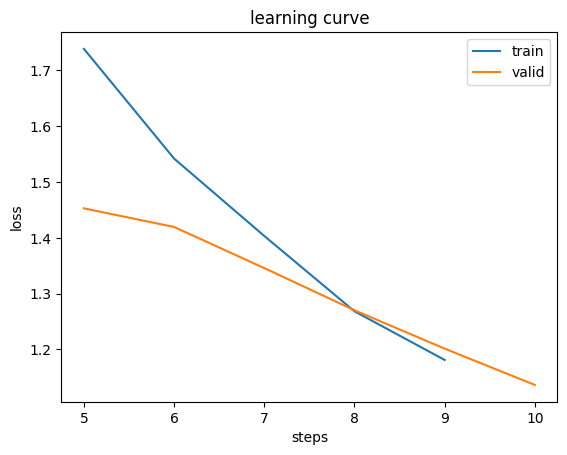

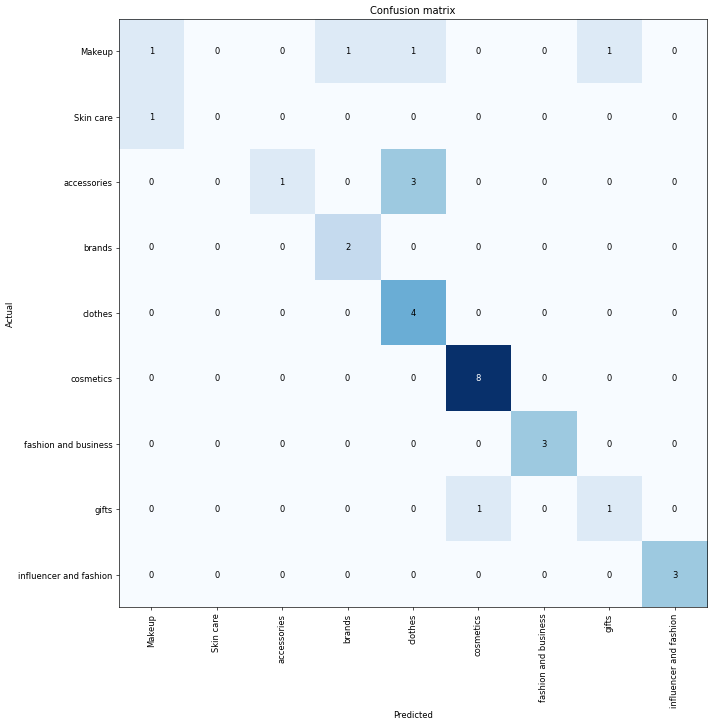

In [19]:

#IMAGE CLASSIFIER 

from fastai.vision.all import *
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
data_dir = '/kaggle/input/cluster-imgs/2024_Myntra_15th_July_Clustering/2024_Myntra_15th_July_Clustering'
train_dir = '/kaggle/working/train'
val_dir = '/kaggle/working/val'
test_dir = '/kaggle/working/test'

# Create directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split data
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        train_images, test_images = train_test_split(images, test_size=0.1, random_state=42)
        train_images, val_images = train_test_split(train_images, test_size=0.2, random_state=42)

        # Create class directories in train, val, test
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

        # Copy files
        for img in train_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))
        for img in val_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))
        for img in test_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

# Prepare data with Fastai
dls = ImageDataLoaders.from_folder(
    path='/kaggle/working',
    train='train',
    valid='val',
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(mult=2)
)

# Load a pre-trained model and fine-tune it
learn = vision_learner(dls, resnet50, metrics=accuracy)

# Train the model
learn.fine_tune(10)

# Save the trained model
learn.save('model_resnet50')

# Plot the training and validation losses
learn.recorder.plot_loss()

# Optionally, you can plot the confusion matrix for more insights
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

# Save the trained model's architecture and weights separately
learn.export('model_resnet50.pkl')

print("Model training and saving completed successfully!")


/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,3.549817,2.464481,0.290323,01:44


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,2.001026,1.950757,0.451613,01:48
1,1.871639,1.706452,0.483871,01:47
2,1.692272,1.608039,0.548387,01:46
3,1.498906,1.626822,0.548387,01:47
4,1.379421,2.013409,0.516129,01:46
5,1.302943,2.399180,0.483871,02:10
6,1.219993,2.368562,0.516129,01:48
7,1.157941,2.436349,0.483871,01:48
8,1.097914,2.424995,0.483871,01:48
9,1.042522,2.441014,0.516129,01:46


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes sh

Model retraining and saving completed successfully!


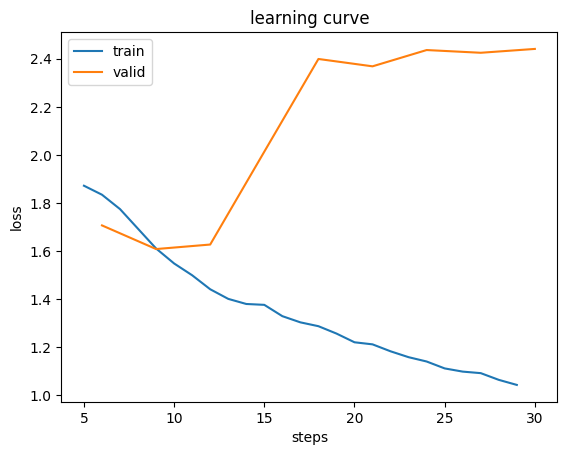

In [22]:
# Import required libraries
from fastai.vision.all import *
import os
import shutil

# Paths for new data
new_data_dir = '/kaggle/input/cluster-imgs/2023_Myntra_15th_July_clustered_images (2)/2023_Myntra_15th_July_clustered_images'
combined_train_dir = '/kaggle/working/combined_train'
combined_val_dir = '/kaggle/working/combined_val'
combined_test_dir = '/kaggle/working/combined_test'

# Create directories
os.makedirs(combined_train_dir, exist_ok=True)
os.makedirs(combined_val_dir, exist_ok=True)
os.makedirs(combined_test_dir, exist_ok=True)

# Combine new data with the existing data
for data_dir in [new_data_dir, '/kaggle/working/train', '/kaggle/working/val', '/kaggle/working/test']:
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            images = os.listdir(class_path)
            
            # Create class directories in combined train, val, test
            os.makedirs(os.path.join(combined_train_dir, class_name), exist_ok=True)
            os.makedirs(os.path.join(combined_val_dir, class_name), exist_ok=True)
            os.makedirs(os.path.join(combined_test_dir, class_name), exist_ok=True)
            
            # Copy files
            for img in images:
                if data_dir == new_data_dir:
                    shutil.copy(os.path.join(class_path, img), os.path.join(combined_train_dir, class_name, img))
                elif data_dir == '/kaggle/working/train':
                    shutil.copy(os.path.join(class_path, img), os.path.join(combined_train_dir, class_name, img))
                elif data_dir == '/kaggle/working/val':
                    shutil.copy(os.path.join(class_path, img), os.path.join(combined_val_dir, class_name, img))
                elif data_dir == '/kaggle/working/test':
                    shutil.copy(os.path.join(class_path, img), os.path.join(combined_test_dir, class_name, img))

# Prepare data with Fastai
combined_dls = ImageDataLoaders.from_folder(
    path='/kaggle/working',
    train='combined_train',
    valid='combined_val',
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=224)
)

# Load the previously trained model
learn = cnn_learner(combined_dls, resnet50, metrics=accuracy)

# Fine-tune the model
learn.fine_tune(10)

# Save the updated model
learn.export('/kaggle/working/model_resnet50_updated.pkl')

# Plot the training and validation losses
learn.recorder.plot_loss()

print("Model retraining and saving completed successfully!")


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


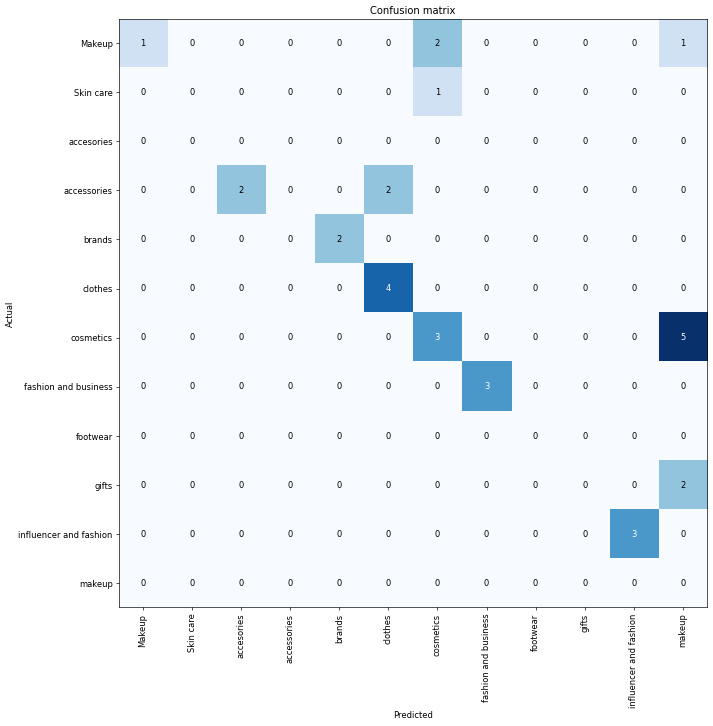

In [23]:
# Optionally, you can plot the confusion matrix for more insights
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)